## Constants definitions

In [2]:
L = 10; % length = 10 m
b = 0.1; % width = 10 cm
d = 0.05; % height = 5 cm
E = 2*10^11; % Young's modulus for steel = 200 GPa = 2x10^11 Pa
I = b*d^3/12; % second moment of inertia
rho = 7850; % mass density of steel = 7850 kg/m^3
g = 9.81; % acceleration due to gravity = 9.81 m/s^2
w = rho*b*d*g; % weight of the beam per unit length (will be our f)

## Class Project Version

In [11]:
n = 10; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n + 1; % number of unknowns to be solved for
A = sparse(N,N); % generating a sparse matrix
% Define the RHS of the system
f = h^4*(pi/5)^4*cos((pi/5)*[0:h:L]');
f(1) = f(N) = 0;

% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Left end
A(1,1) = 1;
A(2,2) = 7;
A(1,2) = 0;
A(1,3) = 0;
A(2,1) = 0;
A(3,1) = 0;
A(2,3) = -4;
A(2,4) = 1;
% Right end
A(N,N) = 1;
A(N-1,N-1) =  7;
A(N-1,N) = 0;
A(N-2,N) = 0;
A(N, N-1) = 0;
A(N, N-2) = 0;
A(N-1,N-2) = -4;
A(N-1,N-3) = 1;

% Solve for y
y = A\f;

x = (0:h:L)';
y_exact = cos((pi/5)*x) - 1;
ErrMax = max(abs(y-y_exact))

ErrMax =   1.3649e-001


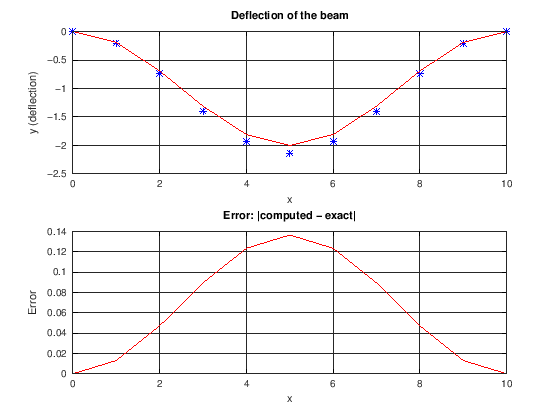

In [12]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

## Class Project Version (Penta)

In [13]:
n = 10; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n + 1; % number of unknowns to be solved for
format short e
% Define the RHS of the system
f = h^4*(pi/5)^4*cos((pi/5)*[0:h:L]');
f(1) = f(N) = 0;

% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, N);
dp1 = dm1 = -4*ones(1, N-1);
dp2 = dm2 = ones(1, N-2);
% Fixed left end
d0(1) = 1.0; d0(2) = 7.0;
dp1(1) = 0.0;
dp2(1) = 0.0;
dm1(1) = 0.0;
dm2(1) = 0.0;
% Fixed right end
d0(N) = 1.0; d0(N-1) = 7.0;
dp1(N-1) = 0.0;
dp2(N-2) = 0.0;
dm1(N-1) = 0.0;
dm2(N-2) = 0.0;
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);

x = (0:h:L)';
y_exact = cos((pi/5)*x) - 1;
ErrMax = max(abs(y-y_exact))

ErrMax =   1.3649e-001


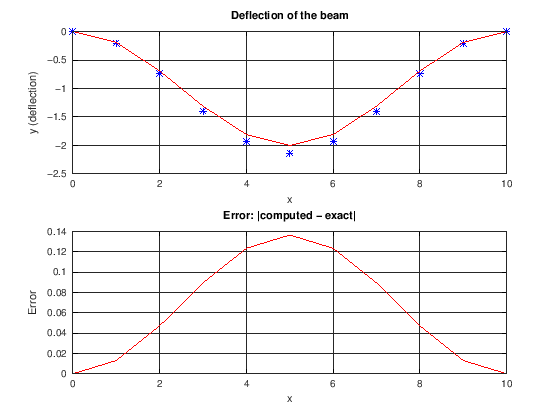

In [14]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

## Sauer first edition (with -12 on bottom right end)

In [17]:
n = 10; % number of subintervals on [h, L]
h = L/(n+1); % discretization spacing
N = n; % number of unknowns to be solved for
A = sparse(N,N);

% Define the RHS of the system
f = h^4*(pi/5)^4*cos((pi/5)*[h:h:L-h]');

% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Leftside
A(1,1) = 12;
A(1,2) = -6;
A(1,3) = (4/3);
A(2,1) = A(2,3) = -4;
A(2,2) = 6;
A(2,4) = 1;

% Rightside
A(N,N-2) = (4/3);
A(N,N-1) = -6;
A(N,N) = -12;
A(N-1,N) = A(N-1,N-2) = -4;
A(N-1,N-1) = 6;
A(N-1,N-3) = 1;

% Finding y
y = A\f;

% Plots
x = (h:h:L - h)';
y_exact = cos((pi/5)*x) - 1;
ErrMax = max(abs(y-y_exact))

ErrMax =   3.3916e-001


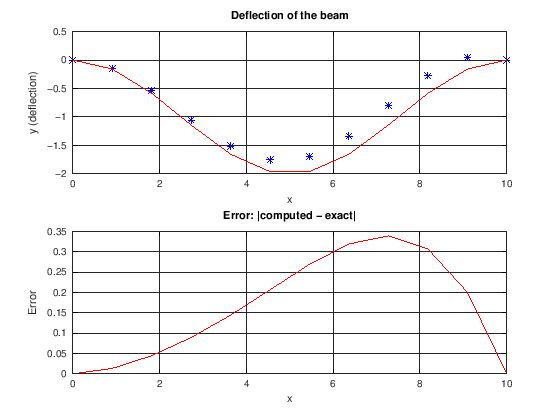

In [21]:
subplot(2,1,1);
plot([0;x;L], [0;y;0], "b*", [0;x;L], [0;y_exact;0], "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot([0;x;L], [0;abs(y - y_exact);0], "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

## Sauer first edition (with +12 on bottom right end) 

In [22]:
n = 10; % number of subintervals on [h, L]
h = L/(n+1); % discretization spacing
N = n; % number of unknowns to be solved for
A = sparse(N,N);

% Define the RHS of the system
f = h^4*(pi/5)^4*cos((pi/5)*[h:h:L-h]');

% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Leftside
A(1,1) = 12;
A(1,2) = -6;
A(1,3) = (4/3);
A(2,1) = A(2,3) = -4;
A(2,2) = 6;
A(2,4) = 1;

% Rightside
A(N,N-2) = (4/3);
A(N,N-1) = -6;
A(N,N) = 12;
A(N-1,N) = A(N-1,N-2) = -4;
A(N-1,N-1) = 6;
A(N-1,N-3) = 1;

% Finding y
y = A\f;

% Plots
x = (h:h:L - h)';
y_exact = cos((pi/5)*x) - 1;
ErrMax = max(abs(y-y_exact))

ErrMax =   1.0597e-001


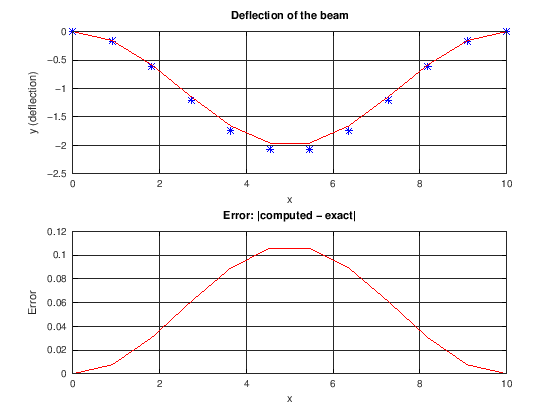

In [23]:
subplot(2,1,1);
plot([0;x;L], [0;y;0], "b*", [0;x;L], [0;y_exact;0], "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot([0;x;L], [0;abs(y - y_exact);0], "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

## Sauer Second Edition

In [ ]:
% Since in Sauer's second edition does not use a pentadiagonal matrix, we must use a more standard approach
% Filling and solving our matrix.

n = 10; % number of subintervals on [h, L]
h = L/n; % discretization spacing
N = n; % number of unknowns to be solved for
A = sparse(N,N);

% Define the RHS of the system
f = h^4*(pi/5)^4*cos((pi/5)*[h:h:L]');

% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Leftside
A(1,1) = 16;
A(1,2) = -9;
A(1,3) = (8/3);
A(1,4) = -(1/4);
A(2,1) = A(2,3) = -4;
A(2,2) = 6;
A(2,4) = 1;

% Rightside
A(N,N-3) = -(1/4);
A(N,N-2) = (8/3);
A(N,N-1) = 9;
A(N,N) = 16;
A(N-1,N) = A(N-1,N-2) = -4;
A(N-1,N-1) = 6;
A(N-1,N-3) = 1;


% Compressing the matrix into a sparse matrix

% Finding y
y = A\f;

% Plots
x = (h:h:L)';
y_exact = cos((pi/5)*x) - 1;
ErrMax = max(abs(y-y_exact))

In [ ]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;